In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
iris=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\DAFT_1022\module_3\Lab_3_Data-Cleaning-Challenge\iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

In [64]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [93]:
iris.shape

(150, 5)

In [66]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [67]:
#only 5 missing values for now

<AxesSubplot:>

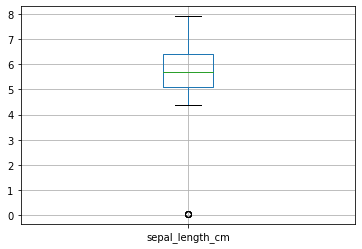

In [68]:
iris.boxplot(column='sepal_length_cm')

In [69]:
iris['sepal_length_cm'].value_counts().sort_index(ascending=False)

7.900     1
7.700     3
7.600     1
7.400     1
7.300     1
7.200     3
7.100     1
7.000     1
6.900     4
6.800     3
6.700     7
6.600     2
6.500     5
6.400     7
6.300     9
6.200     4
6.100     6
6.000     5
5.900     3
5.800     7
5.700     8
5.600     7
5.500     5
5.400     6
5.300     1
5.200     4
5.100     9
5.000    10
4.900     6
4.800     5
4.700     2
4.600     4
4.500     1
4.400     3
0.067     1
0.060     1
0.057     1
0.055     2
Name: sepal_length_cm, dtype: int64

In [70]:
#We are told that the data set is in the expected range, but in total we have 5 values that are outliers

In [71]:
#Even without missing values we will explore the data in the descriptive "class" column 
#to make sure everything is spelled the same

In [72]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [73]:
#we can now see that we have 6 rows with incorrect spelling

# Data Cleaning

In [74]:
iris.update(iris.loc[iris['sepal_length_cm']< 0.1, ['sepal_length_cm']] * 100)

<AxesSubplot:>

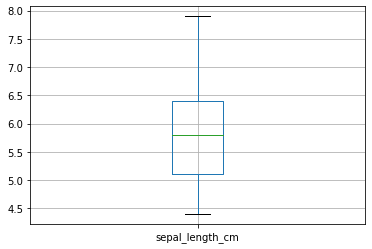

In [75]:
iris.boxplot(column='sepal_length_cm')

In [76]:
#The repartition now looks correct

In [77]:
iris.loc[iris['petal_width_cm'].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [78]:
#we can see that the missing petal width all belong to the same class, which means we can replace the missing values 
#by the mean of said class


In [79]:
setosa_mean = np.mean(iris['petal_width_cm'][(iris['class']=='Iris-setosa')])
setosa_mean

0.25

In [80]:
iris['petal_width_cm']=iris['petal_width_cm'].fillna(setosa_mean)

In [81]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [82]:
#no more missing values

In [83]:
#Correction of the value in the class column

In [89]:
iris=iris.replace('versicolor', 'Iris-versicolor')

In [87]:
iris=iris.replace('Iris-setossa', 'Iris-setosa')

In [90]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [92]:
iris.to_csv(r'C:\Users\cleme\Desktop\IronHack\IronClement\Module 3\Lab3\iris_clean.csv')

In [95]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# --------Machine Learning modules-------------

In [94]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ----------------Splitting between train set and test set------------------------

In [97]:
x = iris.drop(['class'], axis=1)
y = iris['class']
# print(x.head())
print(x.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [ ]:
#another way to split data

#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold()
#skf.get_n_splits(x, y)
#print(skf)

#for train_index, test_index in skf.split(x, y):
#    print("TRAIN:", train_index, "TEST:", test_index)

# ----------K Nearest Neighbour----------

------------- 1 -------------------
[[20  0  0]
 [ 0 19  2]
 [ 0  1 18]]
------------- 2 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  4 15]]
------------- 3 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
------------- 4 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 5 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 6 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 7 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 8 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 9 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 10 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 11 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 12 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 13 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 14 -------------------
[[20  0  0

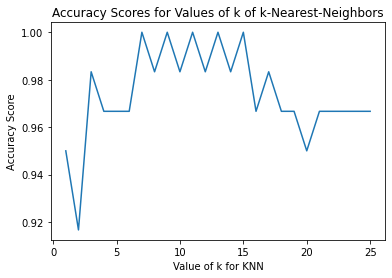

In [101]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
#produces confusion matrix where we can see diagonnaly if each entrey has been classified correctly

#Plus a chart where you can see for which number of groups the knn model was the most efficient/correct

# ----------Decision Tree---------------

In [102]:
#--------Executing the decision tree model-----------
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.967


In [103]:
tree.feature_importances_

array([0.        , 0.        , 0.03015096, 0.96984904])

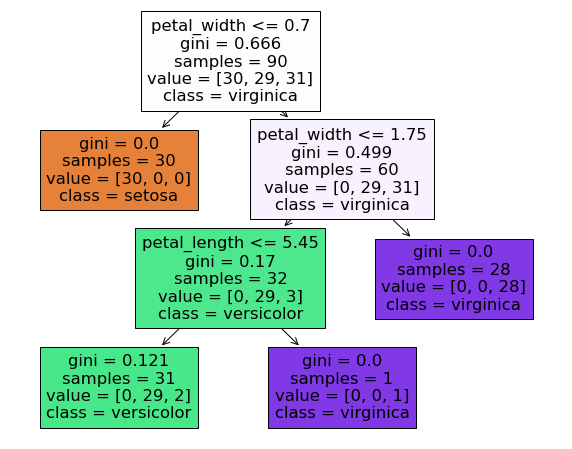

In [108]:
#--------Plotting a graphical representation of the decision tree process-----------

plt.figure(figsize = (10,8))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


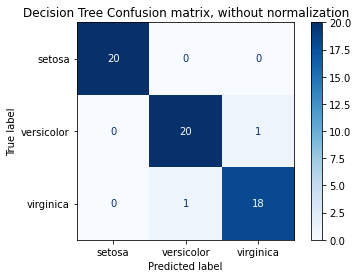

In [105]:
#--------Plotting a confusion matrix of the decision tree process-----------
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [109]:
#--------function made to help create confusion matrix more easily-----------

def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# -------------RadiusNeighborsClassifier---------------

In [111]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier()
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")

The accuracy for Radius Neighbors Classifier is: 95.0 %



The classification report for Radius Neighbors Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.88      1.00      0.93        21
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60



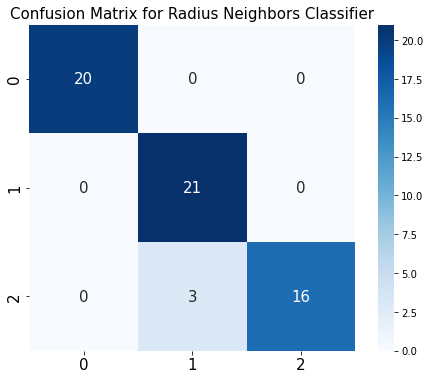

In [112]:
#-------calling the earlier function to plot confusion matrix---------

generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

# ----------RandomForestClassifier----------------

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 95.0 %



The classification report for RandomForestClassifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.95      0.93        21
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



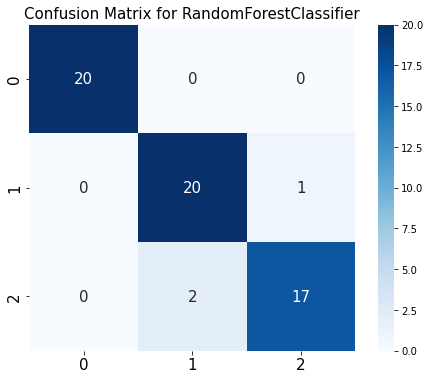

In [116]:
generate_results(rfc, y_pred, 'RandomForestClassifier')

# ----------Logistic Regression----------------

In [117]:
#-----------------------Encoding the training and test set to be able to use logistic regression------------------------------
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [122]:
#--------------calling logistic regression model------------------

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [123]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')

The accuracy of the Logistic Regression is: 95.0 %



The classification report for Logistic Regression is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.95      0.93        21
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



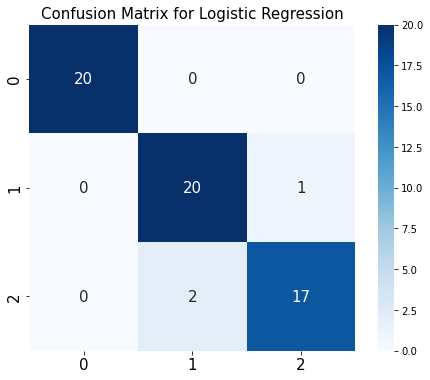

In [124]:
generate_results(lr, y_pred, 'Logistic Regression')